Questions link

https://docs.google.com/document/d/1YwfMJejx-KsqipLj5j3uuRMNJA79bI4g/edit

Dataset link
https://docs.google.com/spreadsheets/d/1jEyXq7bHR_Sovp0_uval5sWCWer6Tavr/edit#gid=1059678006

# Part 0: Critical Thinking

What is the per/day consumption of bread (grams) in Ukraine in the past 100 days? Explain how did you conclude this answer and what was your approach towards this question in brief


I took a bottom-up approach.
Considering an ordinary, urban household with 4 individuals
Each bread packet suppose has 20 pieces
Number of bread packets needed per month = 27
Therefore, per head consumption = (10/4) = 4.5 bread slice per person
current approx population of ukraine is 42 million

Urban population: 70% of total population
Above poverty line population: 40% of total population
Therefore, net population to consider:
42*0.7*0.4 = 11.76 million. 

Population distribution: (Age-wise)
0 – 10 (consume say 2 bread per day): 20% of the population {which equals to (11.76*0.2*2) million slices per day = 4.7 million bread slices per day}
10 – 60 (consume 5 bread slice per day): 65% of the population {which equals to (11.76*0.65*5) million slices per day = 38.2 million slices per day}
60+ (consume 3 bread slice per day): 15% {which equals to (11.76*0.15*3) million slices per day = 5.3 million slices per day}
Total approximate consumption = (4.7 + 38.2 +5.3) million slices/day = 48.2 million slices/day

Each slice of bread is apporoximately 40 grams 

So, the per/day consumption of bread (grams) = 48.2 * 40 = 1,928 million grams

# Part 1: Descriptive Analysis

In [1]:
# Reading assignment.xlsx excel file

In [2]:
# assignment.xlsx has 2 worksheets named 'Funnel' and 'AB_Test'.
# Without the need of downloading this excel document, still we can read it as follows 

# data processing libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

sheet_id='1jEyXq7bHR_Sovp0_uval5sWCWer6Tavr'
xls=pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")

# creating separate dataframes for 'Funnel' sheet and 'AB_Test' sheet

funnel_df=pd.read_excel(xls,'Funnel')
ab_test_df=pd.read_excel(xls,'AB_Test')

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
funnel_df

,Year,Month,Segment,Region,KPI,Value Type,Value
0,2020,12,Clients,India,Lv1_Visitors,Actuals,3665558
1,2020,12,Clients,India,Lv2_Visitors,Actuals,2689569
2,2020,12,Clients,India,Lv3_Visitors,Actuals,1300571
3,2020,12,Clients,India,Lv4_Visitors,Actuals,717608
4,2020,12,Clients,India,Lv3_Visitors,Actuals,706677
...,...,...,...,...,...,...,...
1567,2022,1,Customers,Dehradun,Lv5_Visitors,Actuals,1693
1568,2022,1,Customers,Aurangabad,Lv4_Visitors,Actuals,1428
1569,2022,1,Customers,Ujjain,Lv5_Visitors,Actuals,1311
1570,2022,1,Customers,Faridabad,Lv5_Visitors,Actuals,1071


In [4]:
# Exploring funnel_df dataset

In [5]:
funnel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1572 non-null   int64 
 1   Month       1572 non-null   int64 
 2   Segment     1572 non-null   object
 3   Region      1572 non-null   object
 4   KPI         1572 non-null   object
 5   Value Type  1572 non-null   object
 6   Value       1572 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 86.1+ KB


So it is clear we don't have any missing values in funnel_df dataset

In [6]:
funnel_df.shape

(1572, 7)

There are 1572 rows and 7 columns in Funnel dataset

In [7]:
# Unique values and Number of unique values present for each column of funnel_df dataset: 

In [8]:
for i in funnel_df.columns[:]:
    print(i,'\n',funnel_df[i].unique())
    print('Number of unique values:',funnel_df[i].nunique(),'\n'*2)

Year 
 [2020 2021 2022]
Number of unique values: 3 


Month 
 [12 11 10  9  8  7  6  5  4  3  2  1]
Number of unique values: 12 


Segment 
 ['Clients' 'Customers']
Number of unique values: 2 


Region 
 ['India' 'Uddepy' 'Dehradun' 'Ujjain' 'Indore' 'Faridabad' 'Aurangabad']
Number of unique values: 7 


KPI 
 ['Lv1_Visitors' 'Lv2_Visitors' 'Lv3_Visitors' 'Lv4_Visitors'
 'Lv5_Visitors']
Number of unique values: 5 


Value Type 
 ['Actuals']
Number of unique values: 1 


Value 
 [3665558 2689569 1300571 ...    1311    1071     527]
Number of unique values: 1558 




# Barplot analysis

<AxesSubplot:>

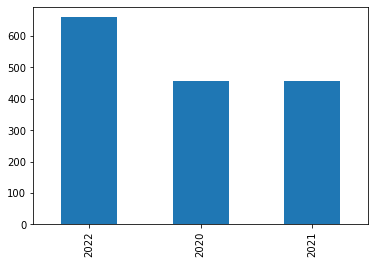

In [9]:
funnel_df["Year"].value_counts().head(10).plot(kind="bar")

<AxesSubplot:>

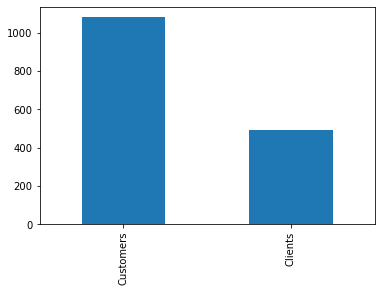

In [10]:
funnel_df["Segment"].value_counts().head(10).plot(kind="bar")

<AxesSubplot:>

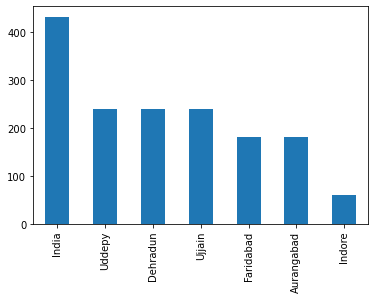

In [11]:
funnel_df["Region"].value_counts().head(10).plot(kind="bar")

<AxesSubplot:>

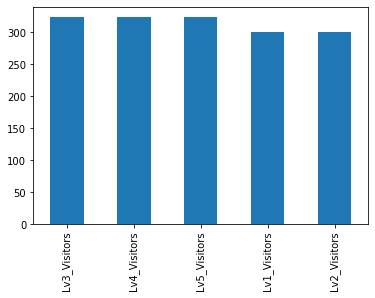

In [12]:
funnel_df["KPI"].value_counts().head(10).plot(kind="bar")

# Analysis Summary so far for Funnel dataset
1) This dataset has data with respect to 3 years - 2020, 2021, 2022 and that too for all months of each year. Each month (from January to December) referred to as numbers from 1 to 12 

2) It has data with respect to 2 segments of people: Customers and Clients

3) Data is with respect to 6 Indian cities in particular-Uddepy (i.e. Udipi), Dehradun, Ujjain, Faridabad, Aurangabad, Indore. Remaining data is with respect to visitors who anonymously mentioned only Country name India without specifying which city they belong to.

5)KPI column which means Key Performance Indicator seems to be a metric column which shows which level of visitors are visiting the website, the visitor's level number ranging from 1 to 5

6) Value Type column has categorical value and that too of only one type which is 'Actuals'.

7) Value column seems like number of visitors 

This Funnel dataset looks like data about Visitors visiting ...
Name of dataset is Funnel. For a company, A funnel analysis is a method of understanding the steps required to reach an outcome on a website and how many users get through each of those steps. The set of steps is referred to as a “funnel” because the typical shape visualizing the flow of users is similar to a funnel in your kitchen or garage.
Businesses use funnel analysis to trace the user journey throughout their website, optimize it, and see how many visitors end up in each stage of the funnel.

Also, on investigating Funnel dataset, we can verify that it is indeed data about the number of visitors visiting Fittlyf website with details with respect to 5 different levels of visitors belonging to 2 different categories- Clients as well as Customers, for each month of the years 2020, 2021, 2022. 

Data about different levels KPI that tracks Fittlyf website's traffic 

In [13]:
# "Year" and 'Month' columns have discrete values. Hence converting these columns to object (or str type) 

In [14]:
funnel_df[['Year', 'Month']] = funnel_df[['Year', 'Month']].astype(str)

In [15]:
# checking whether the data type of these 2 columns have been converted to str or not
funnel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1572 non-null   object
 1   Month       1572 non-null   object
 2   Segment     1572 non-null   object
 3   Region      1572 non-null   object
 4   KPI         1572 non-null   object
 5   Value Type  1572 non-null   object
 6   Value       1572 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 86.1+ KB


In [16]:
funnel_df

,Year,Month,Segment,Region,KPI,Value Type,Value
0,2020,12,Clients,India,Lv1_Visitors,Actuals,3665558
1,2020,12,Clients,India,Lv2_Visitors,Actuals,2689569
2,2020,12,Clients,India,Lv3_Visitors,Actuals,1300571
3,2020,12,Clients,India,Lv4_Visitors,Actuals,717608
4,2020,12,Clients,India,Lv3_Visitors,Actuals,706677
...,...,...,...,...,...,...,...
1567,2022,1,Customers,Dehradun,Lv5_Visitors,Actuals,1693
1568,2022,1,Customers,Aurangabad,Lv4_Visitors,Actuals,1428
1569,2022,1,Customers,Ujjain,Lv5_Visitors,Actuals,1311
1570,2022,1,Customers,Faridabad,Lv5_Visitors,Actuals,1071


Since for some rows the exact city name which the Client/Customer belongs to is not mentioned instead just written of in general as India, so i will add up all those values whose Region is India and remaining all data (like Year, Month,Segment,KPI) is same

In [17]:
funnel_df.groupby(['Year','Month','Segment','Region','KPI','Value Type'], as_index=False)['Value'].sum()

,Year,Month,Segment,Region,KPI,Value Type,Value
0,2020,1,Clients,India,Lv1_Visitors,Actuals,3322789
1,2020,1,Clients,India,Lv2_Visitors,Actuals,2304318
2,2020,1,Clients,India,Lv3_Visitors,Actuals,2410633
3,2020,1,Clients,India,Lv4_Visitors,Actuals,1157186
4,2020,1,Clients,India,Lv5_Visitors,Actuals,363939
...,...,...,...,...,...,...,...
1495,2022,9,Customers,Ujjain,Lv1_Visitors,Actuals,20001
1496,2022,9,Customers,Ujjain,Lv2_Visitors,Actuals,12821
1497,2022,9,Customers,Ujjain,Lv3_Visitors,Actuals,7224
1498,2022,9,Customers,Ujjain,Lv4_Visitors,Actuals,2586


We can see we have merged those rows whose city name was anonymous and just mentioned off as India. I will save the above as new dataframe which will be better to work

In [18]:
new_funnel=funnel_df.groupby(['Year','Month','Segment','Region','KPI','Value Type'], as_index=False)['Value'].sum()

In [19]:
new_funnel

,Year,Month,Segment,Region,KPI,Value Type,Value
0,2020,1,Clients,India,Lv1_Visitors,Actuals,3322789
1,2020,1,Clients,India,Lv2_Visitors,Actuals,2304318
2,2020,1,Clients,India,Lv3_Visitors,Actuals,2410633
3,2020,1,Clients,India,Lv4_Visitors,Actuals,1157186
4,2020,1,Clients,India,Lv5_Visitors,Actuals,363939
...,...,...,...,...,...,...,...
1495,2022,9,Customers,Ujjain,Lv1_Visitors,Actuals,20001
1496,2022,9,Customers,Ujjain,Lv2_Visitors,Actuals,12821
1497,2022,9,Customers,Ujjain,Lv3_Visitors,Actuals,7224
1498,2022,9,Customers,Ujjain,Lv4_Visitors,Actuals,2586


this dataset is segment analysis of a website. Get website traffic data on each section of a website and analyze the performance of a particular line of business, category, topic, or brand on a website.

Suppose that this dataset is for a website like Flipkart, what could be the possible definitions of the columns Level(visitors) 1, 2, 3, 4 and 5 in the given dataset? Do you observe any pattern?

Since the 5 different levels of visitors is mentioned as KPI, that means this column is important to track the performance of this website.

Possible definitions of these levels of visitors can be as follows:

Level 1 visitor: Those who just visited the website, went through some data and that's it

Level 2 visitor: A visitor who has signed up an account in this website

Level 3 visitor: Visitor who has products saved in cart but not yet purchased

Level 4 visitor:Visitor who has made a purchase

Level 5 visitor: A repeated purchaser

In [20]:
# We will plott Values for each level of Visitors separately for Clients and Customers.

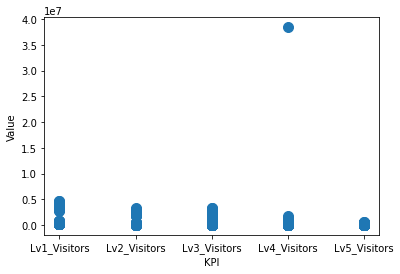

In [21]:
new_funnel[new_funnel["Segment"] == 'Clients'].plot.scatter(x = 'KPI', y = 'Value', s = 100);

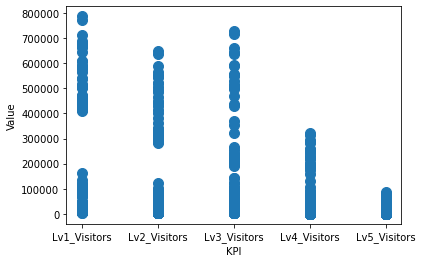

In [22]:
new_funnel[new_funnel["Segment"] == 'Customers'].plot.scatter(x = 'KPI', y = 'Value', s = 100);

In both the above plots, we can see that Lv4_Visitors are comparatively very low than Lv1_Visitors.
Means as per our assumed definition for level visitors, visitors finally making a purchase is low compared to the number of visitors

# Give a pivot view summary and suitable visualization to answer the following question: 

What was the total number of visitors segmented by each level, every month in each year?

In [23]:
# to find number of visitors segmented by each level, every month for 2020
pivot_2020 = np.round(pd.pivot_table(new_funnel[new_funnel["Year"] == '2020'],  
                                values='Value',
                                index='Month', 
                                columns=['KPI'], 
                                aggfunc=np.sum))
pivot_2020

KPI,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors
Month,,,,,
1,3928041,2765271,2965989,1392282,432501
10,5301025,3751545,3685645,1564191,510797
11,4514268,3223226,2881184,1280953,452552
12,4446232,3304935,2683006,1193322,413082
2,3611176,2510550,2711901,1272036,388833
3,4153670,2883993,3137029,1490653,463865
4,5535973,3910298,4197245,2147745,663513
5,5660716,4118410,4367712,38847029,653319
6,4930513,3532115,3514933,1562415,519698


In [24]:
# to find number of visitors segmented by each level, every month for year 2021
pivot_2021 = np.round(pd.pivot_table(new_funnel[new_funnel["Year"] == '2021'],  
                                values='Value',
                                index='Month', 
                                columns=['KPI'], 
                                aggfunc=np.sum))
pivot_2021

KPI,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors
Month,,,,,
1,4599499,3427053,2808389,1265810,431654
10,3839830,2440480,2070340,885540,308226
11,4244211,2657505,2159881,1003236,353576
12,4172845,2634373,2094714,936473,314603
2,3978160,2852656,2411639,1081451,369060
3,4085245,2803308,2488462,1136561,385526
4,3894486,2623508,2267941,1013203,327495
5,4060154,2734743,2376839,1051066,342566
6,3512596,2336733,2066367,882378,267300


In [25]:
# to find number of visitors segmented by each level, every month for year 2022
pivot_2022 = np.round(pd.pivot_table(new_funnel[new_funnel["Year"] == '2022'],  
                                values='Value',
                                index='Month', 
                                columns=['KPI'], 
                                aggfunc=np.sum))
pivot_2022

KPI,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors
Month,,,,,
1,5786931,3612449,2950453,1347785,491002
10,5301503,3312989,2523965,1093338,400363
11,5476670,3533584,2684182,1227422,457343
12,4980277,3219889,2645654,1080652,115216
2,5209831,3218617,2612804,1206400,445489
3,5492505,3367104,2642382,1075375,392981
4,5009326,3023011,2381095,1062976,397493
5,5276813,3319900,2322455,993175,366967
6,5270040,3331258,2400946,1003187,361343


# Part 2: Prescriptive Analysis

In [26]:
# our Funnel dataset looks like this
new_funnel.head()

,Year,Month,Segment,Region,KPI,Value Type,Value
0,2020,1,Clients,India,Lv1_Visitors,Actuals,3322789
1,2020,1,Clients,India,Lv2_Visitors,Actuals,2304318
2,2020,1,Clients,India,Lv3_Visitors,Actuals,2410633
3,2020,1,Clients,India,Lv4_Visitors,Actuals,1157186
4,2020,1,Clients,India,Lv5_Visitors,Actuals,363939


We need to Transpose the data into a view as the reference given, ( numbers presented here are not precise )
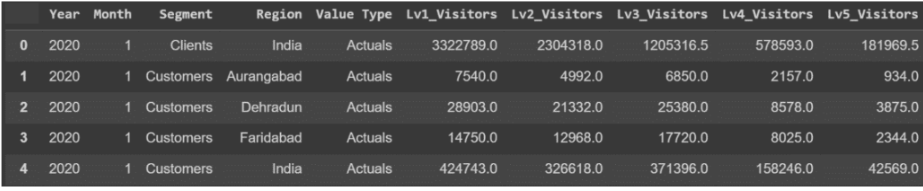

In [27]:
df1 = new_funnel.pivot(index=['Year','Month','Segment','Region','Value Type'],columns='KPI', values='Value')
df1.head()
# we have the got the expected view 

KPI                                         Lv1_Visitors  Lv2_Visitors  \
Year Month Segment   Region     Value Type                               
2020 1     Clients   India      Actuals          3322789       2304318   
           Customers Aurangabad Actuals             7540          4992   
                     Dehradun   Actuals            28903         21332   
                     Faridabad  Actuals            14750         12968   
                     India      Actuals           424743        326618   

KPI                                         Lv3_Visitors  Lv4_Visitors  \
Year Month Segment   Region     Value Type                               
2020 1     Clients   India      Actuals          2410633       1157186   
           Customers Aurangabad Actuals             6850          2157   
                     Dehradun   Actuals            25380          8578   
                     Faridabad  Actuals            17720          8025   
                     India      Actuals           371396        158246   

KPI                                         Lv5_Visitors  
Year Month Segment   Region     Value Type                
2020 1     Clients   India      Actuals           363939  
           Customers Aurangabad Actuals              934  
                     Dehradun   Actuals             3875  
                     Faridabad  Actuals             2344  
                     India      Actuals            42569

In [28]:
df1.reset_index(inplace=True)
df1

KPI,Year,Month,Segment,Region,Value Type,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors
0,2020,1,Clients,India,Actuals,3322789,2304318,2410633,1157186,363939
1,2020,1,Customers,Aurangabad,Actuals,7540,4992,6850,2157,934
2,2020,1,Customers,Dehradun,Actuals,28903,21332,25380,8578,3875
3,2020,1,Customers,Faridabad,Actuals,14750,12968,17720,8025,2344
4,2020,1,Customers,India,Actuals,424743,326618,371396,158246,42569
...,...,...,...,...,...,...,...,...,...,...
295,2022,9,Customers,Dehradun,Actuals,21610,14044,7208,2187,873
296,2022,9,Customers,Faridabad,Actuals,41509,29292,18437,3989,1216
297,2022,9,Customers,India,Actuals,429564,304655,204787,55889,14482
298,2022,9,Customers,Uddepy,Actuals,70026,46402,35871,15342,5069


In [29]:
df1.columns

Index(['Year', 'Month', 'Segment', 'Region', 'Value Type', 'Lv1_Visitors',
       'Lv2_Visitors', 'Lv3_Visitors', 'Lv4_Visitors', 'Lv5_Visitors'],
      dtype='object', name='KPI')

# Assume you are a data analyst at Fittlyf company, analyze the data for the region performing worst in all the years and prescribe what could be the reason and how to improve the number of visitors from that region.

Since we need to analyze data for each region of all the years, we only need to analyze total number of visitors of respective regions and not separately for Lv1_Visitors, Lv2_Visitors, Lv3_Visitors, Lv4_Visitors, Lv5_Visitors.
So i will make a new dataframe by replacing all level visitors of df1 dataframe with a new column which is the addition of all the 5 level visitors

In [30]:
df2=df1.copy()
df2

KPI,Year,Month,Segment,Region,Value Type,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors
0,2020,1,Clients,India,Actuals,3322789,2304318,2410633,1157186,363939
1,2020,1,Customers,Aurangabad,Actuals,7540,4992,6850,2157,934
2,2020,1,Customers,Dehradun,Actuals,28903,21332,25380,8578,3875
3,2020,1,Customers,Faridabad,Actuals,14750,12968,17720,8025,2344
4,2020,1,Customers,India,Actuals,424743,326618,371396,158246,42569
...,...,...,...,...,...,...,...,...,...,...
295,2022,9,Customers,Dehradun,Actuals,21610,14044,7208,2187,873
296,2022,9,Customers,Faridabad,Actuals,41509,29292,18437,3989,1216
297,2022,9,Customers,India,Actuals,429564,304655,204787,55889,14482
298,2022,9,Customers,Uddepy,Actuals,70026,46402,35871,15342,5069


In [31]:
df2["Total_Visitors"] = df2["Lv1_Visitors"]+df2["Lv2_Visitors"]+df2["Lv3_Visitors"]+df2["Lv4_Visitors"]+df2["Lv5_Visitors"]

In [32]:
# Remove those 5 columns of Level visitors
df2.drop(['Lv1_Visitors','Lv2_Visitors','Lv3_Visitors','Lv4_Visitors','Lv5_Visitors'], axis=1,inplace=True)
df2

KPI,Year,Month,Segment,Region,Value Type,Total_Visitors
0,2020,1,Clients,India,Actuals,9558865
1,2020,1,Customers,Aurangabad,Actuals,22473
2,2020,1,Customers,Dehradun,Actuals,88068
3,2020,1,Customers,Faridabad,Actuals,55807
4,2020,1,Customers,India,Actuals,1323572
...,...,...,...,...,...,...
295,2022,9,Customers,Dehradun,Actuals,45922
296,2022,9,Customers,Faridabad,Actuals,94443
297,2022,9,Customers,India,Actuals,1009377
298,2022,9,Customers,Uddepy,Actuals,172710


In [33]:
# Doing year-wise analysis to see which Regions perform worst in each year
df2_2020=df2[df2['Year']=='2020']
df2_2021=df2[df2['Year']=='2021']
df2_2022=df2[df2['Year']=='2022']

In [34]:
df2_2020

KPI,Year,Month,Segment,Region,Value Type,Total_Visitors
0,2020,1,Clients,India,Actuals,9558865
1,2020,1,Customers,Aurangabad,Actuals,22473
2,2020,1,Customers,Dehradun,Actuals,88068
3,2020,1,Customers,Faridabad,Actuals,55807
4,2020,1,Customers,India,Actuals,1323572
...,...,...,...,...,...,...
79,2020,9,Customers,Dehradun,Actuals,90918
80,2020,9,Customers,Faridabad,Actuals,98135
81,2020,9,Customers,India,Actuals,1916060
82,2020,9,Customers,Uddepy,Actuals,316396


since we need to see how each region perform for an entire year separately (say for 2020), so we will do groupby dataframe with respect to regions and add up the Total_Visitors of all months

In [35]:
df2_2020=df2_2020.groupby('Region').sum()
# we renamed dataframe with same name and now we will reset_index as above operation made 'Region' as index by default
df2_2020.reset_index(inplace=True)
# since Region='India' includes data of several cities together we don't know about,obviously we will top the chart
# that would make observing data of other known cities difficult, hence deleting data about Region='India'
df2_2020.drop(df2_2020[df2_2020['Region'] == 'India'].index, inplace = True)
df2_2020.rename(columns = {'Total_Visitors':'Total_Visitors_2020'}, inplace = True)
# renamed Total_Visitors to specify year in its name for better understanding
df2_2020

KPI,Region,Total_Visitors_2020
0,Aurangabad,285497
1,Dehradun,1172070
2,Faridabad,1170281
4,Uddepy,4376357
5,Ujjain,1176987


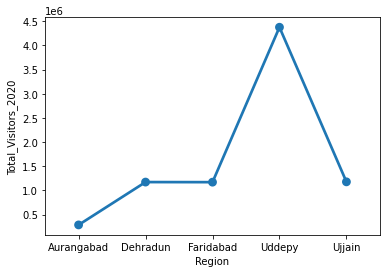

In [36]:
sns.pointplot(x = "Region",y = "Total_Visitors_2020",data = df2_2020)
# show the plot
plt.show()

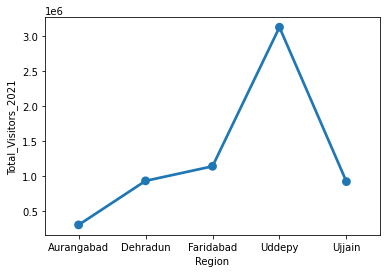

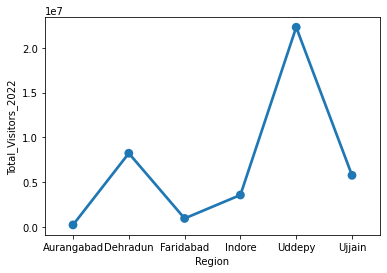

In [37]:
# we do the same thing for years 2021 and 2020
# for 2021
df2_2021=df2_2021.groupby('Region').sum()
df2_2021.reset_index(inplace=True)
df2_2021.drop(df2_2021[df2_2021['Region'] == 'India'].index, inplace = True)
df2_2021.rename(columns = {'Total_Visitors':'Total_Visitors_2021'}, inplace = True)
sns.pointplot(x = "Region",y = "Total_Visitors_2021",data = df2_2021)
# show the plot
plt.show()

# for 2022
df2_2022=df2_2022.groupby('Region').sum()
df2_2022.reset_index(inplace=True)
df2_2022.drop(df2_2022[df2_2022['Region'] == 'India'].index, inplace = True)
df2_2022.rename(columns = {'Total_Visitors':'Total_Visitors_2022'}, inplace = True)
sns.pointplot(x = "Region",y = "Total_Visitors_2022",data = df2_2022)
# show the plot
plt.show()

# So from above graphs it is clear Aurangabad region performed worst in all the years 2020, 2021, 2022

# Based on the given data, identify which region is having a better YearOnYear growth ?

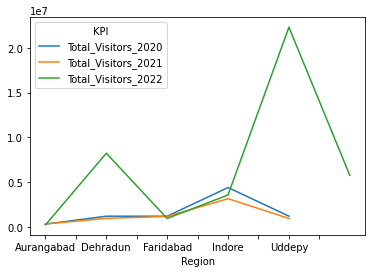

In [38]:

firstPlot = df2_2020.plot(x='Region') # where the 'Date' is the column with date.

df2_2021.plot(x='Region', ax=firstPlot)
df2_2022.plot(x='Region', ax=firstPlot)
plt.rcParams['figure.figsize'] = [25,20]
plt.show()

From above graph, we can see that Total Visitors almost remain the same for regions like Aurangabad and Faridabad, the number of visitors decrease from 2020 to 2022. For Indore, Value decreases for year 2021 as compared to 2020 and then slightly increases but not par the value in 2020. While for regions like Dehradun and Uddepy, from 2020 to 2021 we see a slight decrease then a complete shoot up increase for year 2022. 
# Uddepy shows better Year on Year growth

Guess what could be the meaning of Level1 visitors, level 2 visitors up to level 5 and then answer the following- 

Create a new feature (Level 5 visitors/Level 1 visitors) and what are the top 3 states based on that created feature for all the available segments and each given year. 

Create any other metric apart from (Level5 visitors/Level1 visitors) and perform the same task as above. Compare if the states are same in both the questions, if they are different try to create a hypothesis about the reason behind it.


Possible definitions of these levels of visitors can be as follows:

Level 1 visitor: Those who just visited the website, went through some data and that's it

Level 2 visitor: A visitor who has signed up an account in this website

Level 3 visitor: Visitor who has products saved in cart but not yet purchased

Level 4 visitor:Visitor who has made a purchase

Level 5 visitor: A repeated purchaser

In [39]:
# reading previously created dataframe df1
df1.head()

KPI,Year,Month,Segment,Region,Value Type,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors
0,2020,1,Clients,India,Actuals,3322789,2304318,2410633,1157186,363939
1,2020,1,Customers,Aurangabad,Actuals,7540,4992,6850,2157,934
2,2020,1,Customers,Dehradun,Actuals,28903,21332,25380,8578,3875
3,2020,1,Customers,Faridabad,Actuals,14750,12968,17720,8025,2344
4,2020,1,Customers,India,Actuals,424743,326618,371396,158246,42569


In [40]:
# to this dataframe, i am creating a new column Lv5_by_Lv1 which is obtained by dividing Lv5_Visitors by Lv1_Visitors.
# this new column is a metric that measures that out of the number of visitors visited how many are repeated purchasers.
df1['Lv5_by_Lv1']=(df1['Lv5_Visitors']/df1['Lv1_Visitors']).round(2)
df1.head()

KPI,Year,Month,Segment,Region,Value Type,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors,Lv5_by_Lv1
0,2020,1,Clients,India,Actuals,3322789,2304318,2410633,1157186,363939,0.11
1,2020,1,Customers,Aurangabad,Actuals,7540,4992,6850,2157,934,0.12
2,2020,1,Customers,Dehradun,Actuals,28903,21332,25380,8578,3875,0.13
3,2020,1,Customers,Faridabad,Actuals,14750,12968,17720,8025,2344,0.16
4,2020,1,Customers,India,Actuals,424743,326618,371396,158246,42569,0.10


# what are the top 3 cities based on that created feature for all the available segments and each given year. 

In [41]:
# for 2020, the top 3 cities based on new feature Lv5_by_Lv1
top3_2020 = pd.pivot_table(df1[df1['Year']=='2020'],values = ["Month","Segment","Lv1_Visitors","Lv2_Visitors","Lv3_Visitors","Lv4_Visitors","Lv5_Visitors","Lv5_by_Lv1"],index = "Region",aggfunc = max)
top3_2020.sort_values('Lv5_by_Lv1', ascending=False).nlargest(3, 'Lv5_by_Lv1')

KPI,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors,Lv5_by_Lv1,Month,Segment
Region,,,,,,,,
Faridabad,41520,36685,46064,23011,8263,0.20,9,Customers
Uddepy,163816,121829,145075,69401,23213,0.17,9,Customers
Aurangabad,8719,6101,9067,3246,1363,0.16,9,Customers


In [42]:
# for 2021, the top 3 cities based on new feature Lv5_by_Lv1
top3_2021 = pd.pivot_table(df1[df1['Year']=='2021'],values = ["Month","Segment","Lv1_Visitors","Lv2_Visitors","Lv3_Visitors","Lv4_Visitors","Lv5_Visitors","Lv5_by_Lv1"],index = "Region",aggfunc = max)
top3_2021.sort_values('Lv5_by_Lv1', ascending=False).nlargest(3, 'Lv5_by_Lv1')

KPI,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors,Lv5_by_Lv1,Month,Segment
Region,,,,,,,,
Faridabad,41080,35243,38476,21310,8543,0.21,9,Customers
Ujjain,38575,30287,32802,17320,7807,0.20,9,Customers
Aurangabad,11162,8459,9050,4108,1760,0.18,9,Customers


In [43]:
# for 2022, the top 3 cities based on new feature Lv5_by_Lv1
top3_2022 = pd.pivot_table(df1[df1['Year']=='2022'],values = ["Month","Segment","Lv1_Visitors","Lv2_Visitors","Lv3_Visitors","Lv4_Visitors","Lv5_Visitors","Lv5_by_Lv1"],index = "Region",aggfunc = max)
top3_2022.sort_values('Lv5_by_Lv1', ascending=False).nlargest(3, 'Lv5_by_Lv1')

KPI,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors,Lv5_by_Lv1,Month,Segment
Region,,,,,,,,
Indore,147244,85963,74326,40124,19556,0.13,9,Clients
Dehradun,294710,175647,141763,68934,34695,0.12,9,Customers
Ujjain,209151,132272,106839,46469,21321,0.11,9,Customers


# Summary about top 3 cities based on feature Lv5_by_Lv1 for all the available segments and each given year.

1) For year 2020, the top 3 cities orderwise are : Faridabad, Uddepy, Aurangabad
2) For year 2021, the top 3 cities orderwise are : Faridabad, Ujjain, Aurangabad
3) For year 2022, the top 3 cities orderwise are : Indore, Dehradun, Ujjain


# Create any other metric apart from (Level5 visitors/Level1 visitors) and what are the top 3 cities based on that created feature for all the available segments and each given year. 

In [44]:
# to this dataframe, i am creating a new column Lv4_by_Lv1 which is obtained by dividing Lv4_Visitors by Lv1_Visitors.
# this new column is a metric that measures that out of the number of visitors visited how many ended up purchasing some product.
df1['Lv4_by_Lv1']=(df1['Lv4_Visitors']/df1['Lv1_Visitors']).round(2)
df1.head()

KPI,Year,Month,Segment,Region,Value Type,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors,Lv5_by_Lv1,Lv4_by_Lv1
0,2020,1,Clients,India,Actuals,3322789,2304318,2410633,1157186,363939,0.11,0.35
1,2020,1,Customers,Aurangabad,Actuals,7540,4992,6850,2157,934,0.12,0.29
2,2020,1,Customers,Dehradun,Actuals,28903,21332,25380,8578,3875,0.13,0.30
3,2020,1,Customers,Faridabad,Actuals,14750,12968,17720,8025,2344,0.16,0.54
4,2020,1,Customers,India,Actuals,424743,326618,371396,158246,42569,0.10,0.37


In [45]:
# what are the top 3 cities based on  feature Lv4_by_Lv1 for all the available segments and each given year??

In [46]:
# for 2020, the top 3 cities based on new feature Lv4_by_Lv1
top3_2020 = pd.pivot_table(df1[df1['Year']=='2020'],values = ["Month","Segment","Lv1_Visitors","Lv2_Visitors","Lv3_Visitors","Lv4_Visitors","Lv5_Visitors","Lv4_by_Lv1"],index = "Region",aggfunc = max)
top3_2020.sort_values('Lv4_by_Lv1', ascending=False).nlargest(4, 'Lv4_by_Lv1')

KPI,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv4_by_Lv1,Lv5_Visitors,Month,Segment
Region,,,,,,,,
India,4703447,3333479,3393510,38408015,8.17,555127,9,Customers
Faridabad,41520,36685,46064,23011,0.64,8263,9,Customers
Uddepy,163816,121829,145075,69401,0.51,23213,9,Customers
Ujjain,36029,28542,35947,13944,0.41,5413,9,Customers


In [47]:
# in above we will ignore the first rank going to India because that is with respect to some few anonymous cities
# so we will consider the next top 3

In [48]:
# for 2021, the top 3 cities based on new feature Lv4_by_Lv1
top3_2021 = pd.pivot_table(df1[df1['Year']=='2021'],values = ["Lv4_by_Lv1"],index = "Region",aggfunc = max)
top3_2021.sort_values('Lv4_by_Lv1', ascending=False).nlargest(3, 'Lv4_by_Lv1')

KPI,Lv4_by_Lv1
Region,
Faridabad,0.56
Ujjain,0.45
Uddepy,0.42


In [49]:
# for 2022, the top 3 cities based on new feature Lv4_by_Lv1
top3_2022 = pd.pivot_table(df1[df1['Year']=='2022'],values = ["Lv4_by_Lv1"],index = "Region",aggfunc = max)
top3_2022.sort_values('Lv4_by_Lv1', ascending=False).nlargest(3, 'Lv4_by_Lv1')

KPI,Lv4_by_Lv1
Region,
Indore,0.27
Faridabad,0.25
Uddepy,0.25


# Summary about top 3 cities based on feature Lv5_by_Lv1 for all the available segments and each given year.

1) For year 2020, the top 3 cities orderwise are : Faridabad, Uddepy, Ujjain
2) For year 2021, the top 3 cities orderwise are : Faridabad, Ujjain, Uddepy
3) For year 2022, the top 3 cities orderwise are : Indore, Faridabad, Uddepy


# Part 3: Prediction 

In [50]:
# since we need to do prediction for level 5 column, i will make use of df1 dataframe that i have created

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [52]:
dftest1=df1.copy()
dftest1

KPI,Year,Month,Segment,Region,Value Type,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors,Lv5_by_Lv1,Lv4_by_Lv1
0,2020,1,Clients,India,Actuals,3322789,2304318,2410633,1157186,363939,0.11,0.35
1,2020,1,Customers,Aurangabad,Actuals,7540,4992,6850,2157,934,0.12,0.29
2,2020,1,Customers,Dehradun,Actuals,28903,21332,25380,8578,3875,0.13,0.30
3,2020,1,Customers,Faridabad,Actuals,14750,12968,17720,8025,2344,0.16,0.54
4,2020,1,Customers,India,Actuals,424743,326618,371396,158246,42569,0.10,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...
295,2022,9,Customers,Dehradun,Actuals,21610,14044,7208,2187,873,0.04,0.10
296,2022,9,Customers,Faridabad,Actuals,41509,29292,18437,3989,1216,0.03,0.10
297,2022,9,Customers,India,Actuals,429564,304655,204787,55889,14482,0.03,0.13
298,2022,9,Customers,Uddepy,Actuals,70026,46402,35871,15342,5069,0.07,0.22


In [53]:
dftest1.rename_axis('index',inplace=True)

we just need to do prediction for Level 5 column, so i will drop other level columns and even those 2 metrics Lv5_by_Lv1 nd Lv4_by_Lv1 

In [55]:
dftest1.drop(['Value Type','Lv1_Visitors','Lv2_Visitors','Lv3_Visitors','Lv4_Visitors','Lv5_by_Lv1','Lv4_by_Lv1'], axis=1,inplace=True)

In [56]:
dftest1

KPI,Year,Month,Segment,Region,Lv5_Visitors
index,,,,,
0,2020,1,Clients,India,363939
1,2020,1,Customers,Aurangabad,934
2,2020,1,Customers,Dehradun,3875
3,2020,1,Customers,Faridabad,2344
4,2020,1,Customers,India,42569
...,...,...,...,...,...
295,2022,9,Customers,Dehradun,873
296,2022,9,Customers,Faridabad,1216
297,2022,9,Customers,India,14482


In [82]:
# We will create a date column and then convert the date column into datetime type using Pandas 
dftest1['DATE']=pd.to_datetime(dftest1.Year+dftest1.Month,format="%Y%m")
# this gives by default day as 1st since we don't have a day column

In [90]:
dftest1.head()

KPI,Year,Month,Segment,Region,Lv5_Visitors,DATE
index,,,,,,
0,2020,1,Clients,India,363939,2020-01-01
1,2020,1,Customers,Aurangabad,934,2020-01-01
2,2020,1,Customers,Dehradun,3875,2020-01-01
3,2020,1,Customers,Faridabad,2344,2020-01-01
4,2020,1,Customers,India,42569,2020-01-01


In [91]:
# sorting dataframe dftest1 datewise in order
dftest1.sort_values(by='DATE', inplace = True)

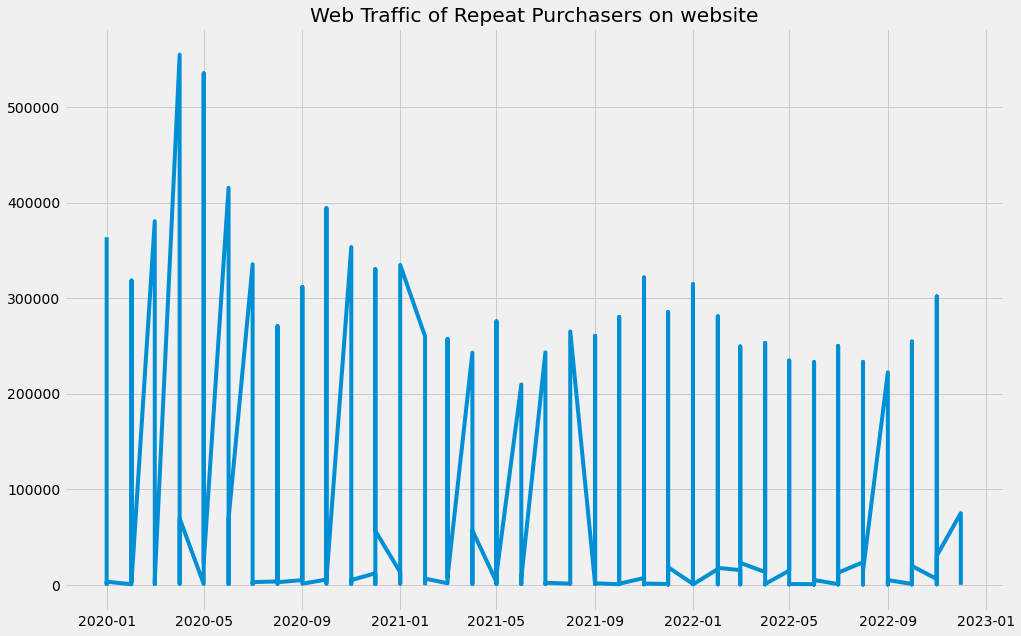

In [93]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(dftest1["DATE"], dftest1["Lv5_Visitors"])
plt.title("Web Traffic of Repeat Purchasers on website")
plt.show()

In [ ]:
# Above shows the graph and pattern of those Level 5 customers.

In [101]:
dftest1.head()

KPI,Year,Month,Segment,Region,Lv5_Visitors,DATE
index,,,,,,
0,2020,1,Clients,India,363939,2020-01-01
1,2020,1,Customers,Aurangabad,934,2020-01-01
2,2020,1,Customers,Dehradun,3875,2020-01-01
3,2020,1,Customers,Faridabad,2344,2020-01-01
4,2020,1,Customers,India,42569,2020-01-01


# Part 4: A/B testing

Using “AB_TEST” sheet in the shared excel file, what is the possible metric you can create for A/B testing excluding no. of clicks and no. of visitors. (Any derived metric from the given no.of clicks and visitors ) – link for refrence https://segment.com/growth-center/a-b-testing-definition/metrics/ 

In [58]:
# the AB_Test dataset looks like this
ab_test_df

,Date,Address,Variations,DeviceType,Clicks,Visitors
0,2023-04-09,fyttlyf/business/campaign/campaigns-business/c...,Control,Desktop,146,1189
1,2023-04-09,fyttlyf/business/campaign/get-paid///,Treatment,Mobile,19,1389
2,2023-04-09,fyttlyf/business/campaign/campaigns-business/s...,Control,Desktop,134,5752
3,2023-04-09,fyttlyf/business/product/business-financial-se...,Control,Mobile,123,462
4,2023-04-09,fyttlyf/business/product/business-accept-payme...,Control,Mobile,126,3177
...,...,...,...,...,...,...
18094,2023-04-08,fyttlyf/personal/campaign/weekoneoffer-terms///,Control,Others,0,1
18095,2023-04-08,fyttlyf/personal//send-money-to-india///,Treatment,Desktop,0,5
18096,2023-04-08,fyttlyf/personal/buy/fyttlyf-benefits///,Control,Mobile,1,20
18097,2023-04-08,fyttlyf/enterprise/product/enterprise-pay-late...,Control,Others,0,4


It is already mentioned that columns 'Clicks' and 'Visitors' are metric for this dataset. So we need to derive another metric from these 2 metrics. I will create a new metric Click_rate which will represent how many clicks were recorded out of total visitors. Click_rate formula will be as follows:

Click_rate=(Number of people who clicked/Number of visitors)*100.

This rate will tell how many people did a click action among those who visited that web page. It can indicate how engaging or useful that webpage is for visitors. 

In [59]:
ab_test_df['Click_rate']=((ab_test_df['Clicks']/ab_test_df['Visitors'])*100).round()

In [60]:
ab_test_df

,Date,Address,Variations,DeviceType,Clicks,Visitors,Click_rate
0,2023-04-09,fyttlyf/business/campaign/campaigns-business/c...,Control,Desktop,146,1189,12.0
1,2023-04-09,fyttlyf/business/campaign/get-paid///,Treatment,Mobile,19,1389,1.0
2,2023-04-09,fyttlyf/business/campaign/campaigns-business/s...,Control,Desktop,134,5752,2.0
3,2023-04-09,fyttlyf/business/product/business-financial-se...,Control,Mobile,123,462,27.0
4,2023-04-09,fyttlyf/business/product/business-accept-payme...,Control,Mobile,126,3177,4.0
...,...,...,...,...,...,...,...
18094,2023-04-08,fyttlyf/personal/campaign/weekoneoffer-terms///,Control,Others,0,1,0.0
18095,2023-04-08,fyttlyf/personal//send-money-to-india///,Treatment,Desktop,0,5,0.0
18096,2023-04-08,fyttlyf/personal/buy/fyttlyf-benefits///,Control,Mobile,1,20,5.0
18097,2023-04-08,fyttlyf/enterprise/product/enterprise-pay-late...,Control,Others,0,4,0.0


In [61]:
ab_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18099 entries, 0 to 18098
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        18099 non-null  datetime64[ns]
 1   Address     18099 non-null  object        
 2   Variations  18099 non-null  object        
 3   DeviceType  18099 non-null  object        
 4   Clicks      18099 non-null  int64         
 5   Visitors    18099 non-null  int64         
 6   Click_rate  18099 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 989.9+ KB


In [62]:
ab_test_df.shape

(18099, 7)

In [63]:
ab_test_df.describe()

,Clicks,Visitors,Click_rate
count,18099.000000,18099.000000,18099.000000
mean,55.521023,479.477485,16.509199
std,377.760167,5705.466343,21.007149
min,0.000000,1.000000,0.000000
25%,0.000000,3.000000,0.000000
50%,2.000000,13.000000,11.000000
75%,12.000000,79.000000,25.000000
max,11190.000000,211849.000000,100.000000


In [64]:
# Unique values and Number of unique values present for each column of ab_test_df dataset: 
for i in ab_test_df.columns[:]:
    print(i,'\n',ab_test_df[i].unique())
    print('Number of unique values:',ab_test_df[i].nunique(),'\n'*2)

Date 
 ['2023-04-09T00:00:00.000000000' '2023-04-10T00:00:00.000000000'
 '2023-04-11T00:00:00.000000000' '2023-04-12T00:00:00.000000000'
 '2023-04-13T00:00:00.000000000' '2023-04-14T00:00:00.000000000'
 '2023-04-15T00:00:00.000000000' '2023-03-29T00:00:00.000000000'
 '2023-03-30T00:00:00.000000000' '2023-03-31T00:00:00.000000000'
 '2023-04-01T00:00:00.000000000' '2023-04-02T00:00:00.000000000'
 '2023-04-03T00:00:00.000000000' '2023-04-04T00:00:00.000000000'
 '2023-04-05T00:00:00.000000000' '2023-04-06T00:00:00.000000000'
 '2023-04-07T00:00:00.000000000' '2023-04-08T00:00:00.000000000']
Number of unique values: 18 


Address 
 ['fyttlyf/business/campaign/campaigns-business/contact///'
 'fyttlyf/business/campaign/get-paid///'
 'fyttlyf/business/campaign/campaigns-business/sign-up///'
 'fyttlyf/business/product/business-financial-services/credit-card///'
 'fyttlyf/business/product/business-accept-payments///'
 'fyttlyf/personal/product/digital-wallet-send-receive-money///'
 'fyttlyf/busin

In [65]:
# Duration of the experiment  ===>> 18 days 
ab_test_df.Date.max(), ab_test_df.Date.min()

(Timestamp('2023-04-15 00:00:00'), Timestamp('2023-03-29 00:00:00'))

# Analysis Summary till now for ab_test_df dataset

1) There are total 18099 rows and 7 columns (including the column 'Click_rate' we newly created)

2) There is one column (Date) of datetime datatype, One column 'Click_rate' of float datatype, 2 columns 'Clicks' and 'Visitors' of int type, and 3 columns 'Address', 'Variations', 'DeviceType' of object type

3) None of the columns have any missing values

4) This dataset is with respect to 18 days ranging from 2023-03-29 to 2023-04-15

5) Address column has 211 unique webpages of Fyttlyf website

6) These webpages have been accessed by users from 4 different Categories of devices 'Desktop', 'Mobile', 'Tablet','Others'.

7) Variation column has 2 unique values 'Control' and 'Treatment'. So the users are using these 2 different variations (meaning versions) of Fittlyf website. Purpose of doing this to understand which version of the website performs better in terms of click rate.

# I will Perform an A/B testing to find which variation of the website whether control or treatment performs better along with using statistical analysis

# Objective of A/B testing:
To increase the click rates for the Fittlyf website

# Making a Hypothesis:

* By the names of the Variation, it seems (or i will say i assume for better explanation and understanding) 'Control' Variation means the original version of Website and 'Treatment' Variation means the modified version of the website. 

* Formulating a hypothesis is important in the A/B testing process because it helps guide the test and analyze the results. In this step, we will define two hypotheses - the null hypothesis and the alternative hypothesis.

* Given we don’t know if the modified variation (Treatment) will perform better or worse (or the same?) as our current variation (Control) , we’ll choose a two-tailed test:

 𝐻0:𝑝=𝑝0

 𝐻𝑎:𝑝≠𝑝0

 where p and p0 stand for the click rate of the treatment and control variation, respectively. We’ll also set a confidence  level of 95%:

 𝛼=0.05

 The alpha value (𝛼) refers to the level of significance. This is a threshold we set, by which we say “if the probability     of observing a result as extreme or more (p-value) is lower than α, then we reject the null hypothesis”. Since our 𝛼=0.05   (indicating 5% probability), our level of confidence (1 — α) is 95%.
 



# Implementing A/B testing

In [66]:
import numpy as np
import pandas as pd
import itertools
import scipy.stats as stats
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, \
    f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings('ignore')

# reading ab_test_df dataset
ab_test_df.head()

,Date,Address,Variations,DeviceType,Clicks,Visitors,Click_rate
0,2023-04-09,fyttlyf/business/campaign/campaigns-business/c...,Control,Desktop,146,1189,12.0
1,2023-04-09,fyttlyf/business/campaign/get-paid///,Treatment,Mobile,19,1389,1.0
2,2023-04-09,fyttlyf/business/campaign/campaigns-business/s...,Control,Desktop,134,5752,2.0
3,2023-04-09,fyttlyf/business/product/business-financial-se...,Control,Mobile,123,462,27.0
4,2023-04-09,fyttlyf/business/product/business-accept-payme...,Control,Mobile,126,3177,4.0


In [67]:
# this dataset has day-wise details and number of visitors  visiting certain pages of the Fittlyf websites 

In [68]:
# checking value counts of both the variations
ab_test_df.Variations.value_counts()

Control      10547
Treatment     7552
Name: Variations, dtype: int64

We have already calculated Duration of the experiment  is ===>> 18 days 

Next, we will randomly sample 5000 users' data from each variation and perform the statistical significance test.

In [69]:
# Sample control and treatment variation
control_sample = ab_test_df[ab_test_df['Variations'] == 'Control'].sample(n = 5000, random_state = 12)
treatment_sample = ab_test_df[ab_test_df['Variations'] == 'Treatment'].sample(n = 5000, random_state = 12)
test = pd.concat([control_sample, treatment_sample], axis=0)
test.reset_index(drop=True, inplace=True)
# Define functions for standard deviation and standard error
std_dev = lambda x : np.std(x, ddof = 0) 
std_error = lambda x : stats.sem(x, ddof = 0)
clk_rate = test.groupby('Variations')['Click_rate'].agg([np.mean, std_dev, std_error])
clk_rate.columns = ['clk_rate', 'std_deviation', 'std_error']
clk_rate

,clk_rate,std_deviation,std_error
Variations,,,
Control,16.5128,19.724093,0.278941
Treatment,16.8582,23.106105,0.326770


Judging by the stats above, it does look like our two Variations performed very similarly, with our new variation (i.e. Treatment) performing slightly better, approx. 16.9 vs. 16.5 click rate.

The click rates for our variations are indeed very close. 

So… the treatment variatioin’s value is slightly higher. Is this difference statistically significant?

Now we will run A/B testing.

For A/B testing to be applied, the data set must satisfy the Normality and Variance homogeneity assumptions. Then, it can be passed to the implementation of the hypothesis tests.

1.If normality and variance homogeneity is provided, an independent two-sample t-test (parametric test) is applied.

2. If normality and homogeneity of variance are not provided, the Mann-Whitney U test (non-parametric test) is performed.      How to check the assumption of normality? In this, we will first determine the H0 and H1 hypotheses.

  * H0 : The assumption of normality is provided.
  
  * H1 : The assumption of normality is not provided.
  
Now let's check the assumption of normality.

# Normality Assumption

In [70]:
test_stat, pvalue = shapiro(control_sample["Click_rate"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.7842, p-value = 0.0000


In [71]:
test_stat, pvalue = shapiro(treatment_sample["Click_rate"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.7413, p-value = 0.0000


H0 is rejected because the p-value is <0.05. The assumption of normality was not provided.

Therefore, we will use the Mann-Whitney U test.

H0 : There is no significant difference between the two variations in terms of click rate 

H1 : There is a difference.

# Mann-Whitney U Test

In [72]:
test_stat, pvalue = mannwhitneyu(control_sample["Click_rate"],
                                 treatment_sample["Click_rate"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 13234542.0000, p-value = 0.0000


H0 is rejected because p-value<0.05. In other words, we can say statistically that there is a difference between the two variations.

# Conclusion

Hence, we have proved by A/B Testing and Statistical Analysis that there is indeed a difference in the performance between the two variations. And that is Treatment variant performs better than Control variant.